# Recommeding the products and their sales to the sales team

In [ ]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Loading

In [2]:
#Load the dataset
df = pd.read_csv('Dataset - Sheet1.csv')
df.head()

,Order ID,Customer Name,Product,Region,"Sales ('000, USD)",Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500,12/01/18 02:00,12/06/18 18:59,False,referral
1,2,Kivell,B,East,400,12/01/18 12:23,12/06/18 19:54,False,display
2,3,James,G,North,100,12/01/18 13:49,13/06/18 16:37,False,social
3,4,Jack,F,West,200,12/01/18 16:07,14/06/18 14:30,False,social
4,5,Anny,B,Central,250,12/01/18 18:25,14/06/18 15:43,True,other


In [3]:
df.shape

(150, 9)

# Data Preprocessing

In [4]:
#Let's do some analysis on the data
class DataFrame_Info():
    def __init__(self):
        print("Attribute information")
    
    def Attribute_information(self,df):
        """
        This method give us the basic information of all the attributes like count of attributes,number of rows & columns,numerical attributes and categorical attributes and so on
        """
        
        data_info=pd.DataFrame(columns=['No of observation',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Factor variables',
                                       'No of Categorival variables',
                                       'No of Logical variables',
                                       'No of Date Variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of observation']=df.shape[0]

        data_info.loc[0,'No of variables']=df.shape[1]
        
        data_info.loc[0,'No of Numerical variables']=df._get_numeric_data().shape[1]
        
        data_info.loc[0,'No of Factor variables']=df.select_dtypes(include='category').shape[1]
        
        data_info.loc[0,'No of Categorival variables']=df.select_dtypes(include='object').shape[1]
        
        data_info.loc[0,'No of Logical variables']=df.select_dtypes(include='bool').shape[1]
        
        data_info.loc[0,'No of Date Variables']=df.select_dtypes(include='datetime64').shape[1]
        
        data_info.loc[0,'No of zero variance variables']=df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        
        data_info.columns=['value']
        
        
        
        return data_info
    
    def __get_missing_values(self,data):
        
        """
        It is a private method ,so it cannot accesed by object outsid ethe class.This function will give us a basic information like count of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values=data.isnull().sum()
        #Feature missing values are ssorted from few to many
        missing_values.sort_values(ascending=False,inplace=True)
        #get the missing values
        return missing_values
    
    def Agg_Tabulation(self,data):
        """
        This method is a extension of additional inforamtion like about the data like Entrophy value,missing value percentage and some observations
        """
        
        print('='*100)
        print('Aggrgation of Table')
        
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1=pd.DataFrame(data.columns,columns=['Names'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of missing']=data.isnull().sum().values
        table['No of unique']=data.nunique().values
        table['Percent of missing']=((data.isnull().sum().values)/(data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
    
        return table
        
        
        print('*'*100)
        print('Interquartile Range')
    def _iqr(self,x):
        """
        It is a private method return you a interquartile range
        """
            
        return x.quantile(q=0.75)-x.quantile(q=0.25)
        
    def __outlier_count(self,x):
        """
        It is a private method which return you a outliers present in a interquartile range
        """
        upper_out=x.quantile(q=0.75)+1.5 * self._iqr(x)
        lower_out=x.quantile(q=0.25)-1.5 * self._iqr(x)
            
        return len(x[x > upper_out])+len(x[x < lower_out])
    def num_count_summary(self,df):
        """
        This method which returns you basic information about Numerical variable like Positive values,Negitive Values,Unique Count,Zero count positive and negitive,infiniyt-count and count of outliers
        """
            
        df_num=df._get_numeric_data()
        data_info_num=pd.DataFrame()
        i=0
        for c in df_num.columns:
            data_info_num.loc[c,'Negitive values']=df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c,'Positive values']=df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c,'Zero values']=df_num[df_num[c]== 0].shape[0]
            data_info_num.loc[c,'Unique_count']=len(df_num[c].unique())
            data_info_num.loc[c,'Negitive_infinity_count']=df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive_infinity_count']=df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Percentage of miisning values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']=self.__outlier_count(df_num[c])
            i= i+1
        return data_info_num
    def statstical_summary(self,df):
        """
        This method which return you a various percentile of the data including count and mean
        """
        df_num=df._get_numeric_data()
        data_stat_num=pd.DataFrame()
            
        try:
            data_stat_num=pd.concat([df_num.describe().transpose(),
                                        pd.DataFrame(df_num.quantile(q=0.1)),
                                        pd.DataFrame(df_num.quantile(q=0.90)),
                                        pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns=['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass
        return data_stat_num

In [5]:
obj = DataFrame_Info()

Attribute information


In [6]:
obj.Attribute_information(df)

,value
No of observation,150
No of variables,9
No of Numerical variables,3
No of Factor variables,0
No of Categorival variables,6
No of Logical variables,1
No of Date Variables,0
No of zero variance variables,0


In [7]:
obj.Agg_Tabulation(df)

Aggrgation of Table


,Name,dtypes,No of missing,No of unique,Percent of missing,First Observation,Second observation,Third Observation
0,Order ID,int64,0,150,0.0,1,2,3
1,Customer Name,object,0,20,0.0,Jones,Kivell,James
2,Product,object,0,7,0.0,A,B,G
3,Region,object,0,5,0.0,South,East,North
4,"Sales ('000, USD)",int64,0,26,0.0,500,400,100
5,Registered At,object,0,148,0.0,12/01/18 02:00,12/01/18 12:23,12/01/18 13:49
6,Purchased At,object,0,150,0.0,12/06/18 18:59,12/06/18 19:54,13/06/18 16:37
7,Refunded,bool,0,2,0.0,False,False,False
8,Origin,object,0,9,0.0,referral,display,social


In [8]:
obj.num_count_summary(df)

,Negitive values,Positive values,Zero values,Unique_count,Negitive_infinity_count,Positive_infinity_count,Percentage of miisning values,Count of outliers
Order ID,0.0,150.0,0.0,150.0,0.0,0.0,0.0,0.0
"Sales ('000, USD)",0.0,150.0,0.0,26.0,0.0,0.0,0.0,0.0
Refunded,0.0,7.0,143.0,2.0,0.0,0.0,0.0,7.0


In [9]:
obj.statstical_summary(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
Order ID,150.0,76.040000,44.358346,1.0,38.25,75.5,113.75,190.0,15.9,136.1,143.55
"Sales ('000, USD)",150.0,289.033333,127.018860,100.0,200.00,300.0,350.00,550.0,110.0,500.0,520.00
Refunded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00


# Exploratory data analysis

In [10]:
df.rename(columns={"Sales ('000, USD)":"Sales"},inplace=True)

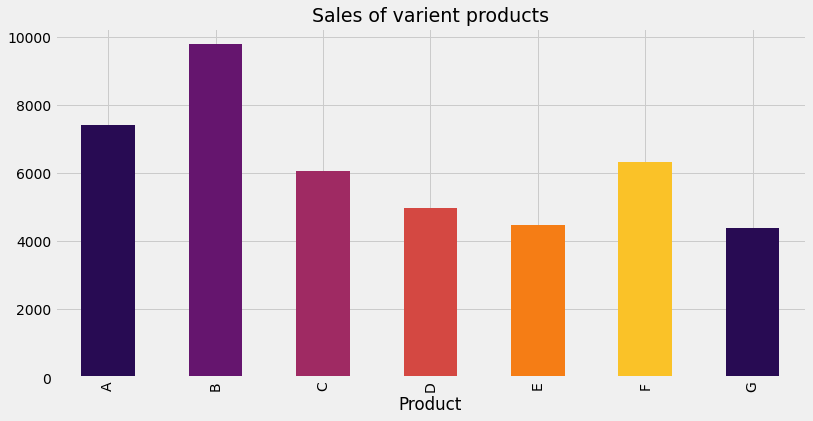

In [11]:
plt.style.use("fivethirtyeight")
fn=19
df.groupby(['Product'])['Sales'].sum().plot.bar(color = sns.color_palette("inferno"),figsize=(12,6))
plt.title("Sales of varient products",fontsize=fn)
plt.show()

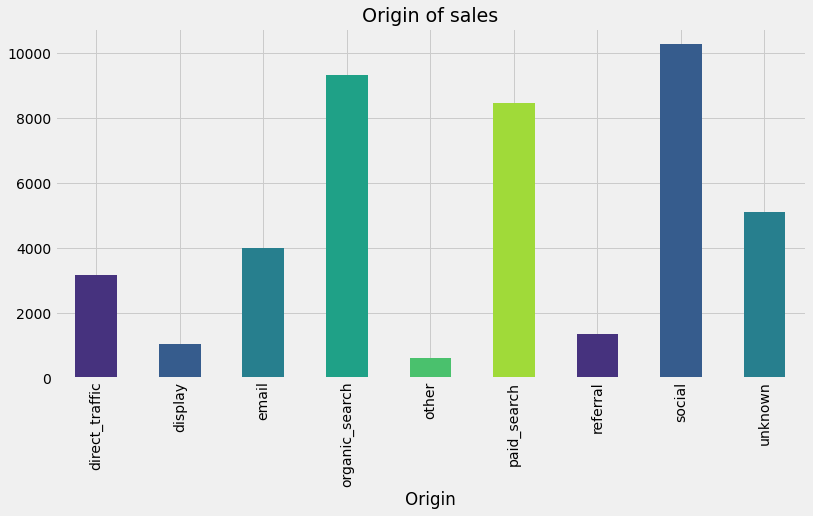

In [12]:
df.groupby('Origin')['Sales'].sum().plot.bar(color = sns.color_palette("viridis"),figsize=(12,6))
plt.title("Origin of sales",fontsize=fn)
plt.show()

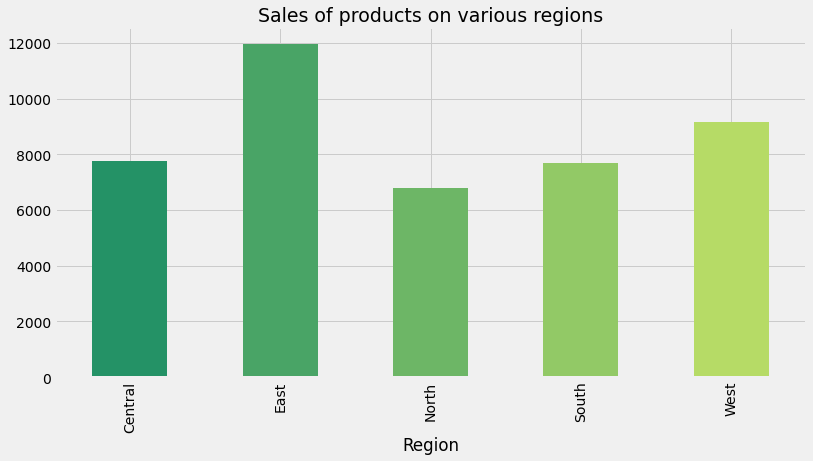

In [13]:
df.groupby('Region')['Sales'].sum().plot.bar(color = sns.color_palette("summer"),figsize=(12,6))
plt.title("Sales of products on various regions",fontsize=fn)
plt.show()

<AxesSubplot:xlabel='Product'>

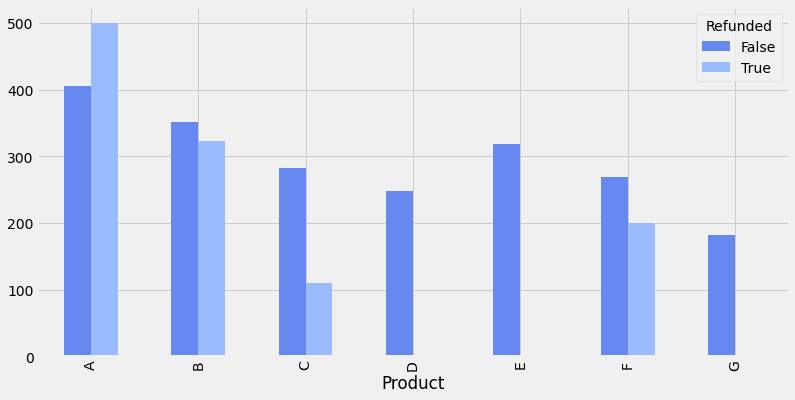

In [14]:
df.pivot_table(values='Sales',index='Product',columns='Refunded').plot.bar(color = sns.color_palette("coolwarm"),figsize=(12,6))

<AxesSubplot:ylabel='Customer Name'>

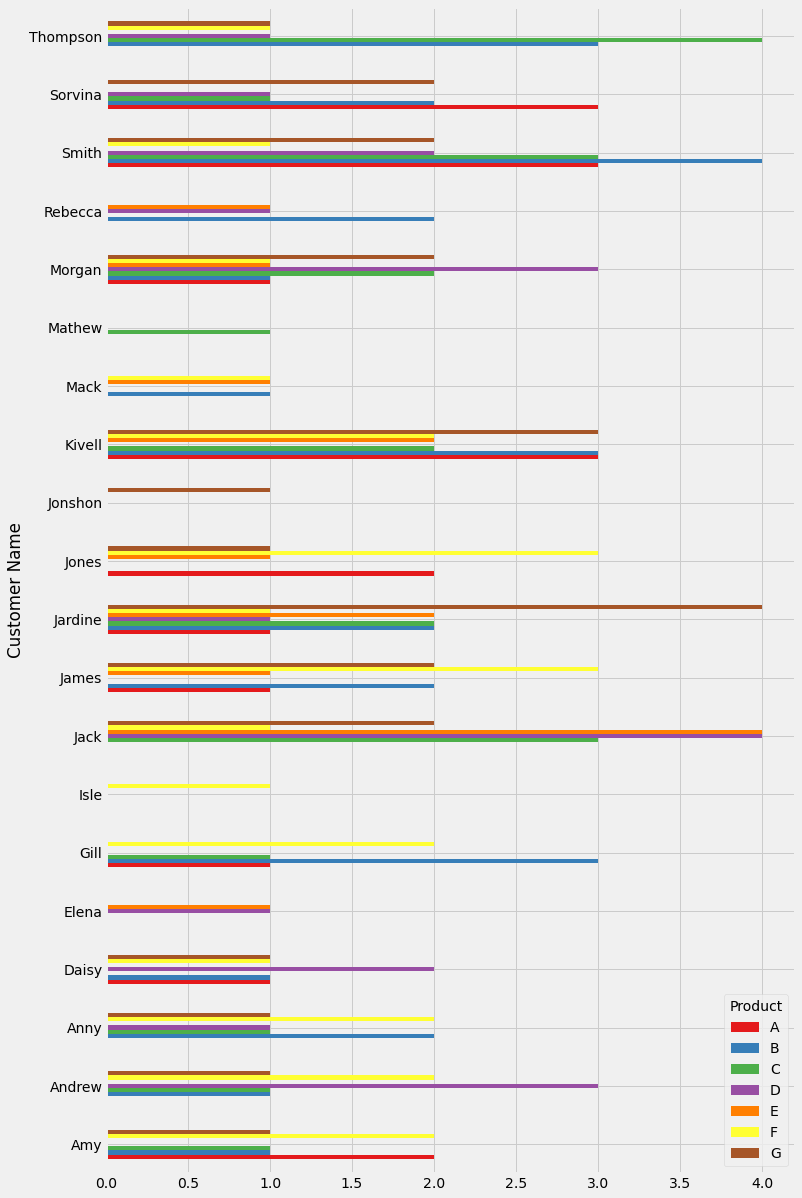

In [15]:
pd.crosstab(df['Customer Name'],df['Product']).plot.barh(color = sns.color_palette("Set1"),figsize=(11,20))

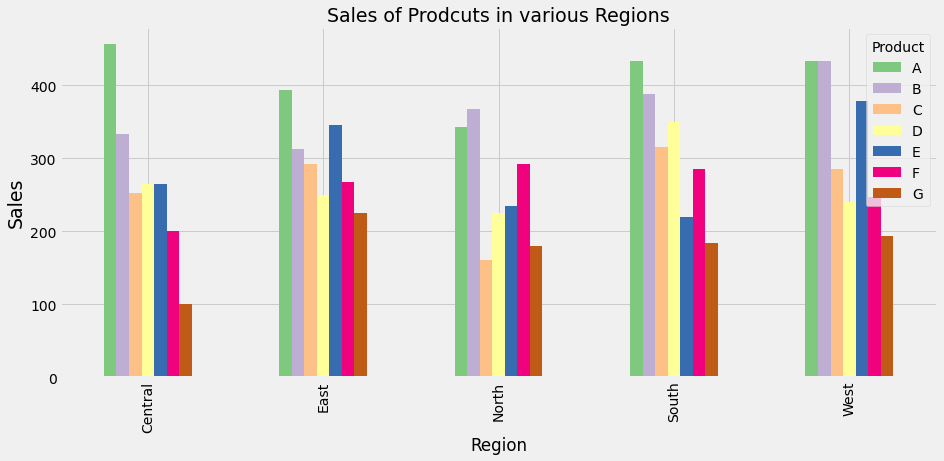

In [16]:
df.pivot_table(values='Sales',columns='Product',index='Region').plot.bar(color = sns.color_palette("Accent"),figsize=(14,6))
plt.title('Sales of Prodcuts in various Regions',fontsize=fn)
plt.ylabel('Sales',fontsize=fn)
plt.show()

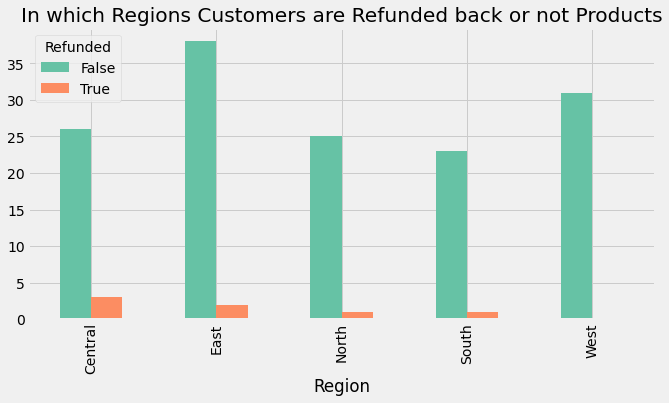

In [17]:
pd.crosstab(df['Region'],df['Refunded']).plot.bar(color=sns.color_palette('Set2'),figsize=(10,5))
plt.title("In which Regions Customers are Refunded back or not Products")
plt.show()

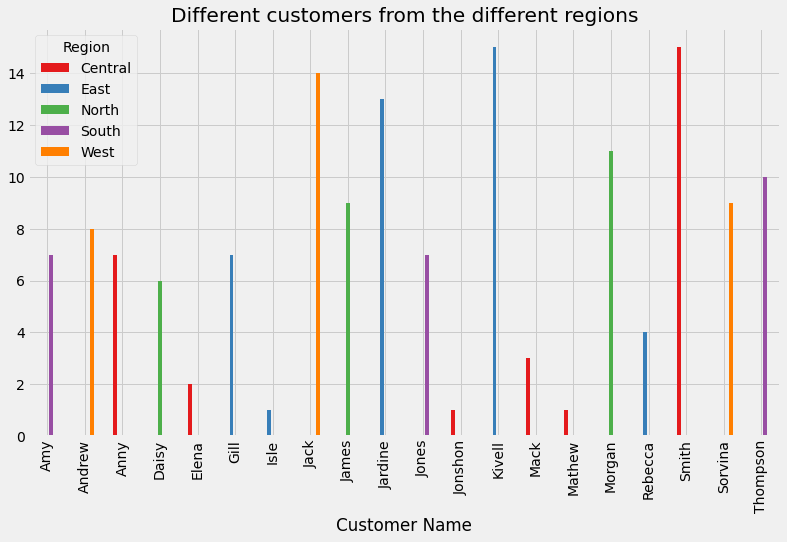

In [40]:
pd.crosstab(df['Customer Name'],df['Region']).plot.bar(color=sns.color_palette('Set1'),figsize=(12,7))
plt.title('Different customers from the different regions')
plt.show()

In [19]:
df['Purchased At'] = df['Purchased At'].astype('datetime64')
df['Registered At'] = df['Registered At'].astype('datetime64')

In [20]:
df['Reg_month'] = df['Registered At'].apply(lambda x: x.month)
df['Reg_day'] = df['Registered At'].apply(lambda x: x.day)
df['Purch_month'] = df['Purchased At'].apply(lambda x: x.month)
df['Purch_day'] = df['Purchased At'].apply(lambda x: x.day)

In [21]:
#Drop the Registered At and Purchased At for now
dff = df.copy()

In [22]:
dff = dff.drop(labels = ['Registered At','Purchased At'],axis=1)

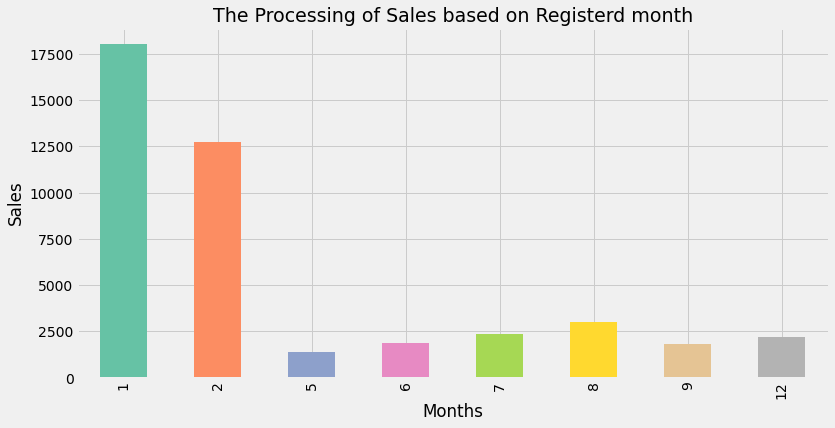

In [23]:
dff.groupby(['Reg_month'])['Sales'].sum().plot.bar(color = sns.color_palette("Set2"),figsize=(12,6))
plt.title("The Processing of Sales based on Registerd month",fontsize=fn)
plt.ylabel('Sales')
plt.xlabel("Months")
plt.show()

<AxesSubplot:xlabel='Purch_month'>

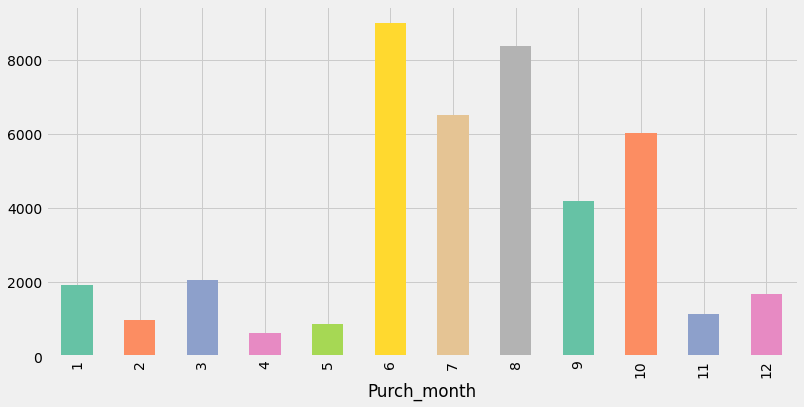

In [24]:
dff.groupby(['Purch_month'])['Sales'].sum().plot.bar(color = sns.color_palette("Set2"),figsize=(12,6))

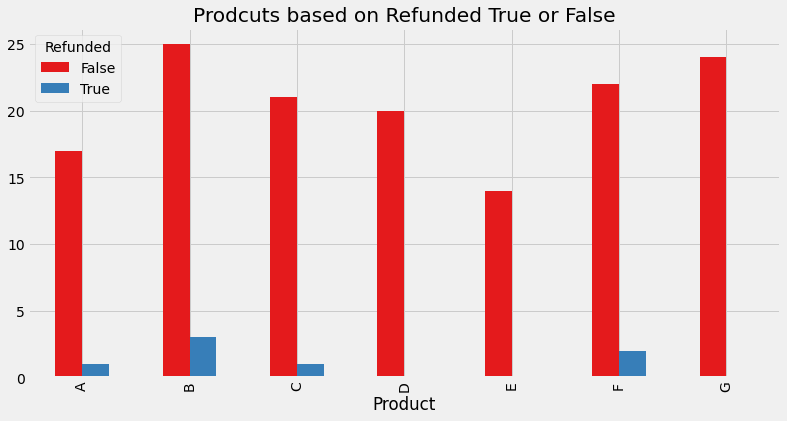

In [25]:
pd.crosstab(dff['Product'],dff['Refunded']).plot.bar(color = sns.color_palette("Set1"),figsize=(12,6))
plt.title("Prodcuts based on Refunded True or False")
plt.show()

In [26]:
#The customers who generating the higher amount of sales
max_sales_cus = dff[dff['Sales'] == dff['Sales'].max()][['Customer Name','Product','Refunded','Region']].reset_index(drop=True)
max_sales_cus

,Customer Name,Product,Refunded,Region
0,Kivell,G,False,East
1,Kivell,E,False,East
2,Jardine,E,False,East
3,Jack,E,False,West


In [27]:
#The customers who generating sales and thier products
min_sales_cus = dff[dff['Sales'] == dff['Sales'].min()][['Customer Name','Product','Refunded','Region']].reset_index(drop=True)
min_sales_cus.head(5)

,Customer Name,Product,Refunded,Region
0,James,G,False,North
1,Morgan,G,False,North
2,Andrew,D,False,West
3,James,G,False,North
4,Jonshon,G,False,Central


# Label Encoding

In [28]:
#Copy the data in to the new variable df2
df2 = dff.copy()

In [29]:
#Label encoding
x=["Customer Name","Product","Region","Refunded","Origin"]
from sklearn.preprocessing import LabelEncoder
for i in x:
  encoder=LabelEncoder()
  df2[i]=encoder.fit_transform(df2[[i]])

C:\Users\vaibhav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
a = dff['Customer Name'].value_counts().keys()
b= df2['Customer Name'].value_counts().keys()

cust_dict = dict()

for i in range(len(a)):
    cust_dict[a[i]] = b[i]
print(cust_dict)

a = dff['Product'].value_counts().keys()
b= df2['Product'].value_counts().keys()

pr_dict = dict()

for i in range(len(a)):
    pr_dict[a[i]] = b[i]
print(pr_dict)

a = dff['Region'].value_counts().keys()
b= df2['Region'].value_counts().keys()

reg_dict = dict()

for i in range(len(a)):
    reg_dict[a[i]] = b[i]
print(reg_dict)


a = dff['Origin'].value_counts().keys()
b= df2['Origin'].value_counts().keys()

org_dict = dict()

for i in range(len(a)):
    org_dict[a[i]] = b[i]
print(org_dict)

a = dff['Refunded'].value_counts().keys()
b= df2['Refunded'].value_counts().keys()

rf_dict = dict()

for i in range(len(a)):
    rf_dict[a[i]] = b[i]
print(rf_dict)

{'Kivell': 12, 'Smith': 17, 'Jack': 7, 'Jardine': 9, 'Morgan': 15, 'Thompson': 19, 'James': 18, 'Sorvina': 8, 'Andrew': 1, 'Amy': 10, 'Jones': 5, 'Gill': 2, 'Anny': 0, 'Daisy': 3, 'Rebecca': 16, 'Mack': 13, 'Elena': 4, 'Mathew': 14, 'Isle': 11, 'Jonshon': 6}
{'B': 1, 'F': 6, 'G': 5, 'C': 2, 'D': 3, 'A': 0, 'E': 4}
{'East': 1, 'West': 4, 'Central': 0, 'North': 2, 'South': 3}
{'social': 7, 'organic_search': 3, 'paid_search': 5, 'unknown': 8, 'email': 2, 'direct_traffic': 0, 'referral': 6, 'display': 1, 'other': 4}
{False: 0, True: 1}


In [31]:
prd_dict={1:'B', 6:'F', 5:'G', 2:'C', 3:'D', 0:'A', 4:'E'}

In [32]:
cust_dicter = {12:'Smith', 17:'Kivell', 7:'Jack', 9:'Jardine', 15:'Morgan', 19:'Thompson', 18:'James',
 8:'Sorvina', 1:'Andrew', 10:'Amy', 5:'Gill', 2:'Jones', 0:'Anny', 3:'Daisy', 16:'Rebecca',
 13:'Mack', 4:'Elena', 14:'Isle', 11:'Jonshon', 6:'Mathew'}

In [33]:
org_dicts={7:'social',3:'organic_search', 5:'paid_search', 8:'unknown', 2:'email',
 0:'direct_traffic', 6:'referral', 1:'display', 4:'other'}

In [34]:
x=df2.drop(labels=['Order ID','Sales'],axis=1)
y=df2['Sales']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building

In [36]:
#Creat a simple model to to predict the sales using RandomForestRegresoor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
rf.score(x_train,y_train)

0.8774472223422166

# Model Input

In [38]:
#inputs
Region = input("Enter Region: ")
Refunded = bool(input("Enter Refunded True OR False: "))
reg_date = input("Enter the Date time (MM-DD-YYYY): ")
Purc_date = input("Enter Purchase Date (MM-DD-YYYY): ")

reg_month = pd.to_datetime(reg_date).month
reg_day = pd.to_datetime(reg_date).day
pur_month = pd.to_datetime(Purc_date).month
pur_day = pd.to_datetime(Purc_date).day

Enter Region: East
Enter Refunded True OR False: False
Enter the Date time (MM-DD-YYYY): 1-2-2020
Enter Purchase Date (MM-DD-YYYY): 6-1-2020


In [39]:
#Generating the sale's and products report's
sales_report=[]
if Region == 'Central':
    if Refunded == True:
        for i in [0,1,2,6]:
            for j in [0,4,11,13,6,12]:
                if j==0:
                    for k in [0,4,5,6,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==4:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],3,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[3],p[0]])
                elif j==11:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],5,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[5],p[0]])
                elif j==13:
                    for k in [0,5]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==6:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],3,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[3],p[0]])
                elif j==12:
                    for k in [2,3,5,6,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
                    
    elif Refunded == False:
        for i in [3,4,5]:
            for j in [0,4,11,13,6,12]:
                if j==0:
                    for k in [0,4,5,6,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==4:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],3,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[3],p[0]])
                elif j==11:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],5,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[5],p[0]])
                elif j==13:
                    for k in [0,5]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==6:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],3,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[3],p[0]])
                elif j==12:
                    for k in [2,3,5,6,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None         
    else:
        None
        
elif Region == 'East':
    if Refunded == True:
        for i in [0,1,2,6]:
            for j in [5,14,17,16]:
                if j==5:
                    for k in [5,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==14:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],3,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[3],p[0]])
                        
                elif j==17:
                    for k in [1,2,3,5,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==16:
                    for k in [0,3,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
                    
    elif Refunded == False:
        for i in [3,4,5]:
            for j in [5,14,17,16]:
                if j==5:
                    for k in [7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==14:
                    p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],3,reg_month,reg_day,pur_month,pur_day]])
                    #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                    sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[3],p[0]])
                elif j==17:
                    for k in [1,2,3,5,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==16:
                    for k in [0,3,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
                    
    else:
        None
elif Region == 'North':
    if Refunded == True:
        for i in [0,1,2,6]:
            for j in [3,18,15]:
                if j==3:
                    for k in [0,2,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==18:
                    for k in [0,3,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==15:
                    for k in [1,5,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
                    
    elif Refunded == False:
        for i in [3,4,5]:
            for j in [3,18,15]:
                if j==3:
                    for k in [0,2,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==18:
                    for k in [0,3,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==15:
                    for k in [1,5,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None                                
    else:
        None
        
elif Region == 'South':
    if Refunded == True:
        for i in [0,1,2,6]:
            for j in [10,2,19]:
                if j==10:
                    for k in [0,3,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==2:
                    for k in [1,3,4,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==19:
                    for k in [0,2,3,5,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
                                   
    elif Refunded == False:
        for i in [3,4,5]:
            for j in [10,2,19]:
                if j==10:
                    for k in [0,3,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==2:
                    for k in [1,3,4,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==19:
                    for k in [0,2,3,5,6,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
                    
    else:
        None
        
elif Region == 'West':
    if Refunded == True:
        print(f"No Customer tried to refunded in this {Region} Region")
#         for i in [0,1,2,6]:
#             for j in [1,7,8]:
#                 p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],org_dict[origin],reg_month,reg_day,pur_month,pur_day]])
#                 #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
#                 sales_report.append([cust_dicter[j],prd_dict[i],p[0]])

    elif Refunded == False:
        for i in [3,4,5]:
            for j in [1,7,8]:
                if j==1:
                    for k in [0,1,2,5,7]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==7:
                    for k in [2,3,4,5,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                elif j==8:
                    for k in [0,2,3,5,7,8]:
                        p = rf.predict([[j,i,reg_dict[Region],rf_dict[Refunded],k,reg_month,reg_day,pur_month,pur_day]])
                        #print(f"Customer Name is {cust_dicter[j]} Recomended Products: {prd_dict[i]} and their sales: {p[0]}/-")
                        sales_report.append([cust_dicter[j],prd_dict[i],org_dicts[k],p[0]])
                else:
                    None
    else:
        None
else:
    None
         
#Create a dataframe and sort the sales (Cheap to High) to the sales team
new_df = pd.DataFrame(sales_report,columns=['CustomerName','Product','Origin','Sales']).sort_values(by='Sales').reset_index(drop=True)

#Recommending the Various products and thier sales to the sales team 
for i in range(len(new_df)):
    print(f"Customer Name: {new_df.loc[i,'CustomerName']} and the Recommended Products are: {new_df.loc[i,'Product']} Origin of {new_df.loc[i,'Origin']} and Generating Sales: {new_df.loc[i,'Sales']}$")
    print('-'*100)

Customer Name: Rebecca and the Recommended Products are: F Origin of organic_search and Generating Sales: 187.95$
----------------------------------------------------------------------------------------------------
Customer Name: Rebecca and the Recommended Products are: F Origin of direct_traffic and Generating Sales: 188.35$
----------------------------------------------------------------------------------------------------
Customer Name: Kivell and the Recommended Products are: F Origin of display and Generating Sales: 189.95$
----------------------------------------------------------------------------------------------------
Customer Name: Kivell and the Recommended Products are: F Origin of organic_search and Generating Sales: 190.55$
----------------------------------------------------------------------------------------------------
Customer Name: Kivell and the Recommended Products are: F Origin of referral and Generating Sales: 190.75$
------------------------------------------

# Note